In [3]:
# Grafiklar chizish uchun kutubxona
import matplotlib.pyplot as plt

# Grafiklarni chiroyli ko‘rsatish uchun kutubxona
import seaborn as sns

# Ma'lumotlar bilan ishlash uchun kutubxona (jadval ko‘rinishidagi ma'lumotlar)
import pandas as pd

# Random Forest algoritmini ishlatish uchun klassifikator (tasniflovchi model)
from sklearn.ensemble import RandomForestClassifier

# Ma'lumotlar to‘plamini o‘rgatish va test qilish uchun ikkiga ajratish funksiyasi
from sklearn.model_selection import train_test_split

# Modellni baholash uchun to‘g‘rilik (accuracy) o‘lchovi
from sklearn.metrics import accuracy_score

# Modellni baholash uchun aniqlik (precision), chaqqonlik (recall), va F1 o‘lchovlari
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
# 1. Ma'lumotni yuklab olamiz
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [11]:
# 2. Ba'zi tozalash ishlarini qilamiz
# Bare Nuclei ustunida ba'zida noto'g'ri qiymatlar bo'lishi mumkin, uni to'g'rilaymiz
df = df.replace('?', pd.NA)  # ? belgilarini NaN ga almashtiramiz
df = df.dropna()  # NaN bor qatlarni olib tashlaymiz
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)  # Butun songa o‘tkazamiz

In [13]:
# 3. X va y ni ajratamiz
X = df.drop(['Sample code number', 'Class'], axis=1)  # ID va Class ni olib tashlaymiz
y = df['Class']

In [15]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [18]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [20]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [22]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
# 4. Class qiymatini 2 va 4 dan 0 va 1 ga o‘zgartiramiz (0=Benign, 1=Malignant)
# y = y.replace({2: 0, 4: 1})

In [28]:
# 5. Ma’lumotlarni train/test ga bo‘lamiz
# Ma'lumotlarni train/test ga bo‘lamiz (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 6. Random Forest modelini yaratamiz va o‘rgatamiz
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# 7. Bashorat va baholash
y_pred = model.predict(X_test)

In [36]:
# Modell prediksiya qilgan qiymatlar va asl test qiymatlari
# y_test - haqiqiy qiymatlar, y_pred - model bashoratlari

# 1. Aniqlik (Accuracy) - to'g'ri topilgan natijalar umumiy natijalar soniga nisbati
acc = accuracy_score(y_test, y_pred)

# 2. Aniqlik (Precision) - model ijobiy deganlarning nechta haqiqatan ham ijobiyligini ko'rsatadi
prec = precision_score(y_test, y_pred)

# 3. Qayta aniqlash (Recall) - haqiqiy ijobiylarning nechta qismini model to'g'ri topganini ko'rsatadi
rec = recall_score(y_test, y_pred)

# 4. F1 score - precision va recall o'rtasining muvozanatli o'rtachasi
f1 = f1_score(y_test, y_pred)

In [40]:
# Natijalarni chiqarish izoh bilan
print("To‘g‘rilik (Accuracy):", acc, "→ Model nechta holatda to‘g‘ri bashorat qilgan.")
print("Aniqlik (Precision):", prec, "→ Model ijobiy deb topganlarning nechasi haqiqiy ijobiy.")
print("Chaqqonlik (Recall):", rec, "→ Haqiqiy ijobiylarning nechta qismini topa olgan.")
print("F1 Bahosi:", f1, "→ Aniqlik va chaqqonlikning muvozanatli ko‘rsatkichi.")

To‘g‘rilik (Accuracy): 0.948905109489051 → Model nechta holatda to‘g‘ri bashorat qilgan.
Aniqlik (Precision): 0.9811320754716981 → Model ijobiy deb topganlarning nechasi haqiqiy ijobiy.
Chaqqonlik (Recall): 0.896551724137931 → Haqiqiy ijobiylarning nechta qismini topa olgan.
F1 Bahosi: 0.9369369369369369 → Aniqlik va chaqqonlikning muvozanatli ko‘rsatkichi.


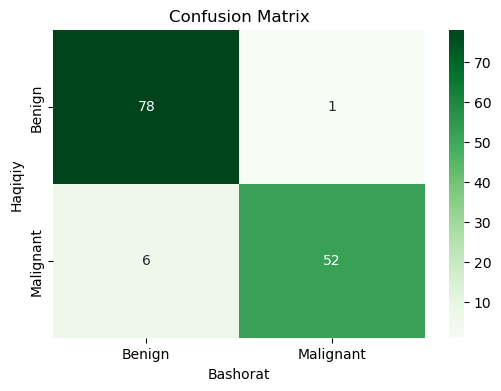

In [42]:
# 8. Confusion Matrix ni hisoblash
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix ni vizualizatsiya qilish
plt.figure(figsize=(6, 4))  # Grafik o'lchamini belgilash
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',
            xticklabels=['Benign', 'Malignant'],  # Bashoratlar uchun yorliqlar
            yticklabels=['Benign', 'Malignant'])  # Haqiqiy sinflar uchun yorliqlar

# O‘qlar va sarlavha
plt.xlabel("Bashorat")       # X o‘qi - model bashorati
plt.ylabel("Haqiqiy")        # Y o‘qi - haqiqiy natija
plt.title("Confusion Matrix")  # Grafik sarlavhasi
plt.show()

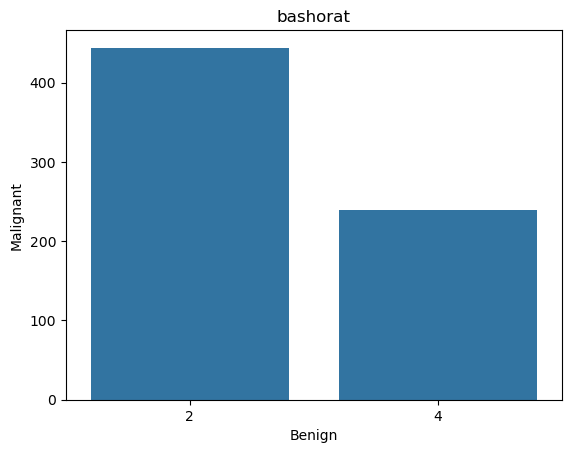

In [69]:
# Grafik 1: Sinf taqsimoti (Sinfga qarab nechta odam borligini ko'rsatadi)
sns.countplot(data=df, x='Class' )
plt.title("bashorat")  # Grafik sarlavhasi
plt.xlabel("Benign")             # X o‘qi: sinf nomlari (masalan, Benign/Malignant yoki 0/1)
plt.ylabel("Malignant")     # Y o‘qi: nechta odam borligi
plt.show()

In [139]:

# 1. Ma'lumotlar lug'at ko‘rinishida
data = {
    'name': ['Maqsudjon', 'Muhammadkarim', 'Azizbek', 'Ravshavbek', 'Islomxon', 'Oyatillo', 'Muslimbek', 'Abdurahmon', 'Abdulloh', 'yusufxon'],
    'year': [2005, 2004, 2005, 2004, 2006, 2005, 2000, 2004, 2002, 2001],
    'direction': ['SI', 'SI', 'TVM(AT)', 'KIMTEX', 'TJBAKT', 'SI', 'EE', 'AX', 'TJBAKT', 'ATT'],
    'interest_in_football': ['yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
}

# 2. Lug'atni DataFrame ga aylantiramiz
df = pd.DataFrame(data)

In [107]:
df

,name,year,direction,interest_in_football
0,Maqsudjon,2005,SI,yes
1,Muhammadkarim,2004,SI,yes
2,Azizbek,2005,TVM(ATS),no
3,Ravshavbek,2004,KIMTEX,yes
4,Islomxon,2006,TJBAKT,yes
5,Oyatillo,2005,SI,yes
6,Muslimbek,2000,EE,yes
7,Abdurahmon,2004,AX,yes
8,Abdulloh,2002,TJBAKT,yes
9,yusufxon,2001,ATT,yes


In [109]:
# X va y ni ajratamiz
X = df.drop('year', axis=1)
y = df['year']

In [115]:
#  Kategorik ustunlarni raqamli qilish (One-Hot Encoding)
X_encoded = pd.get_dummies(X)

In [117]:
 # Ma'lumotlarni train/test ga bo‘lamiz
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [119]:
# Model yaratamiz va o‘rgatamiz
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
# Bashorat va natija
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [123]:
print("Model to‘g‘rilik darajasi (accuracy):", accuracy)

Model to‘g‘rilik darajasi (accuracy): 0.0


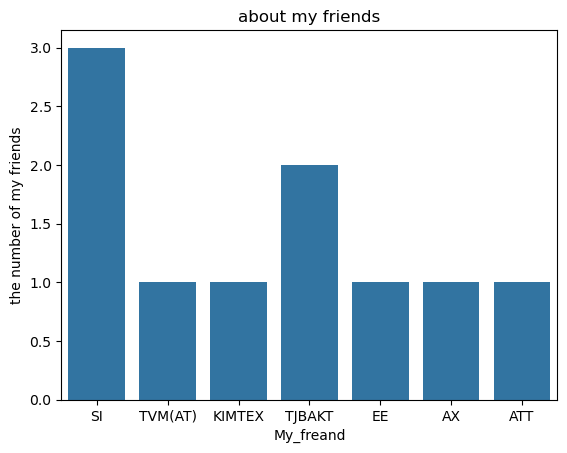

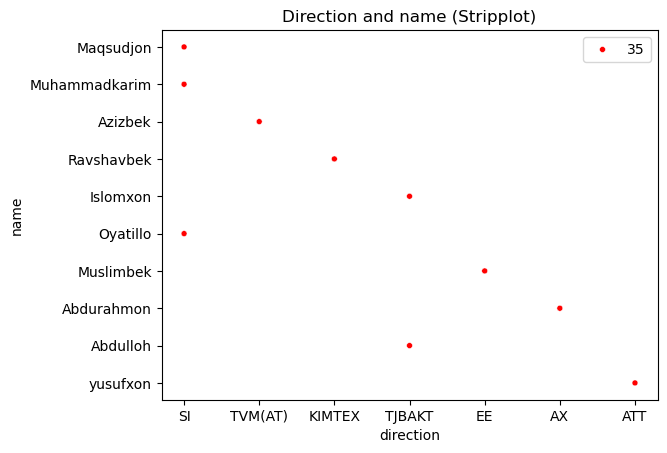

In [157]:
# Grafik 1: Sinf taqsimoti
sns.countplot(data=df, x='direction')
plt.title("about my friends")
plt.xlabel("My_freand")
plt.ylabel("the number of my friends")
plt.show()

# Grafik 2: Yosh vs Maosh bo‘yicha scatter plot
sns.scatterplot(data=df, x='direction', y='name', color='red', size=35 )
plt.title("Direction and name (Stripplot)")
plt.show()

In [163]:
# Modell prediksiya qilgan qiymatlar va asl test qiymatlari
# y_test - haqiqiy qiymatlar, y_pred - model bashoratlari
y_test = [1, 1, 0, 1, 1, 1, 1, 1, 1, 1]  # Misol uchun haqiqiy test qiymatlari
y_pred = [1, 1, 0, 1, 0, 1, 1, 1, 1, 1]  # Modelning bashoratlari

# 2. Baholash metrikalari
acc = accuracy_score(y_test, y_pred)  # To‘g‘rilik
prec = precision_score(y_test, y_pred)  # Aniqlik
rec = recall_score(y_test, y_pred)  # Qayta aniqlash
f1 = f1_score(y_test, y_pred)  # F1 bahosi

# 3. Baholash metrikalarini lug'atdan DataFramega aylantirish
metrics_data = {
    'Accuracy': [acc],
    'Precision': [prec],
    'Recall': [rec],
    'F1 Score': [f1]
}

# Metrikalarni qo‘shish
df_metrics = pd.DataFrame(metrics_data)

# 4. Lug'atni DataFrame ga aylantiramiz
df = pd.DataFrame(data)

# 5. Ikkala DataFrameni birlashtirish
final_df = pd.concat([df, df_metrics], axis=1)

# 6. Natijani ko‘rish
print(final_df)

            name  year direction interest_in_football  Accuracy  Precision  \
0      Maqsudjon  2005        SI                  yes       0.9        1.0   
1  Muhammadkarim  2004        SI                  yes       NaN        NaN   
2        Azizbek  2005   TVM(AT)                   no       NaN        NaN   
3     Ravshavbek  2004    KIMTEX                  yes       NaN        NaN   
4       Islomxon  2006    TJBAKT                  yes       NaN        NaN   
5       Oyatillo  2005        SI                  yes       NaN        NaN   
6      Muslimbek  2000        EE                  yes       NaN        NaN   
7     Abdurahmon  2004        AX                  yes       NaN        NaN   
8       Abdulloh  2002    TJBAKT                  yes       NaN        NaN   
9       yusufxon  2001       ATT                  yes       NaN        NaN   

     Recall  F1 Score  
0  0.888889  0.941176  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
To‘g‘rilik (Accuracy): 1.0
Aniqlik (Precision): 1.0
Chaqqonlik (Recall): 1.0
F1 Bahosi: 1.0


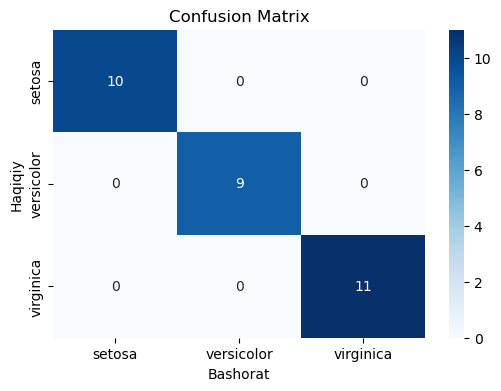

In [159]:
# Kerakli kutubxonalarni chaqiramiz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Ma'lumotlarni yuklaymiz
# Sklearn kutubxonasidagi mashhur 'iris' ma'lumotlar to‘plamidan foydalanamiz
from sklearn.datasets import load_iris

# Ma'lumotlarni yuklab olamiz
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # X qiymatlar
df['target'] = iris.target  # y qiymat (nishon)

# Jadvalni ko‘rib chiqamiz
print(df.head())  # dastlabki 5 qatordan namunalar

# 2. X va y qiymatlarni ajratamiz
X = df.drop('target', axis=1)  # belgilarsiz ustunlar
y = df['target']  # nishon ustun

# Ma'lumotlarni train/test ga bo‘lamiz (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model yaratamiz va uni o‘rgatamiz
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 ta daraxt bilan
model.fit(X_train, y_train)  # modelni o‘rgatish

# 4. Bashorat qilamiz
y_pred = model.predict(X_test)

# 5. Modelni baholaymiz
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')  # ko‘p sinfda macro ishlatiladi
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Natijalarni chiqaramiz
print("To‘g‘rilik (Accuracy):", acc)
print("Aniqlik (Precision):", prec)
print("Chaqqonlik (Recall):", rec)
print("F1 Bahosi:", f1)

# 6. Grafikda ko‘rsatamiz - Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix ni chizamiz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Bashorat')
plt.ylabel('Haqiqiy')
plt.title('Confusion Matrix')
plt.show()
